## Heatmap - 40 x 40 Grid ##

40 x 40 heatmap grid.
Libraries used : 
Pandas, Torch, Matplotlib, Seaborn, Numpy, Random

In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
# Load the historical data
file_path = 'lotto_history.csv'
data = pd.read_csv(file_path)

#Data is arranged on the basis of prior lottery draws from the NZ Lottery.
#Data file has a header row, and is arranged in oldest -> newest, top -> bottom of list
#Formatting as CSV is a convenience, as most spreadsheet applications (local and web)#Read and write this format with low demand.
#File format of CSV is also compact - hundreds, or even thousands of data points are often only kilobytes in size.

In [3]:
# Extract Balls 1 to 6
ball_columns = ['Ball_1', 'Ball_2', 'Ball_3', 'Ball_4', 'Ball_5', 'Ball_6']
balls_data = data[ball_columns]

#This is fully customisable - if only wanting to examine one ball e.g. Ball_1 , this can be done at will.

In [4]:
# Initialize a 40x40 matrix to count occurrences of pairs
pair_matrix = torch.zeros((40, 40), dtype=torch.int32)

# Here, the maximum is set by the system being examined. For NZ Lotteries, there are a total of 40 balls only
# Other lotteries make use of less, or more balls depending on their system
# This pair matrix is invariant - it is not specific for a particular data set read into the balls_data array
# For consideration of fractional values, int32 can be replaced with a real number format

In [5]:
# Iterate over each draw (row) and count occurrences of ball pairs
for index, row in balls_data.iterrows():
    balls = row.values
    for i in range(len(balls)):
        for j in range(i+1, len(balls)):
            ball1 = balls[i] - 1  # Adjust for 0-indexing
            ball2 = balls[j] - 1  # Adjust for 0-indexing
            pair_matrix[ball1, ball2] += 1
            pair_matrix[ball2, ball1] += 1  # Symmetric pair

In [6]:
# Convert the pair matrix to numpy for visualization
pair_matrix_np = pair_matrix.numpy()

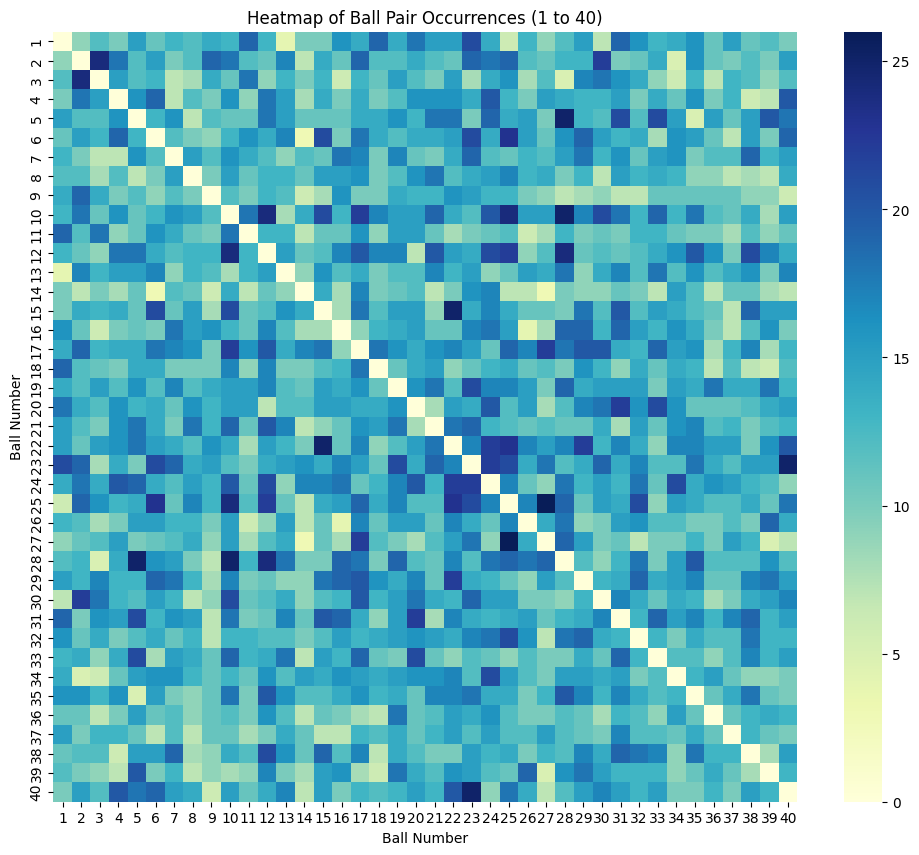

In [7]:
# Plotting the 40x40 heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pair_matrix_np, cmap="YlGnBu", annot=False, cbar=True, xticklabels=range(1, 41), yticklabels=range(1, 41))
plt.title("Heatmap of Ball Pair Occurrences (1 to 40)")
plt.xlabel("Ball Number")
plt.ylabel("Ball Number")
plt.show()

# For fun - taking the heatmap information and trying to make a guess

The following code blocks are a set of functions to generate potential future lottery draws.
Its no better than any other random number generator, but it does attempt to make use of the information derived of the heatmapping

One thing that becomes immediately apparent is that this does **not** have the capacity to predict anything - a good test of this would be 
to run this code for a dataset of the previous draw, omitting that information in the data csv file fed into the array

The chances of predicting the next draw are of course extremely poor - this tool is practically speaking unlikely to allow you to win any money at all.
Re-running the __#Generate Multiple Sets__ code block will quickly demonstrate this to your satisfaction.

In [10]:
# Assuming pair_matrix_np is your heatmap data
# Convert heatmap to frequency list for each ball
ball_frequencies = {i+1: pair_matrix_np[i].sum() for i in range(40)}

In [11]:
# Function to check if a list of numbers is non-sequential
def is_non_sequential(numbers):
    sorted_numbers = sorted(numbers)
    for i in range(len(sorted_numbers) - 1):
        if sorted_numbers[i+1] - sorted_numbers[i] == 1:
            return False
    return True

In [12]:
# Function to generate and validate a set
def generate_set(frequency_dict, size=6):
    while True:
        # Sort balls by frequency in descending order
        sorted_balls = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)
        # Select top frequent balls
        top_balls = [ball for ball, freq in sorted_balls if freq > np.mean(list(frequency_dict.values()))]
        # If less than required, add random balls
        if len(top_balls) < size:
            top_balls.extend(random.sample([ball for ball in range(1, 41) if ball not in top_balls], size - len(top_balls)))
        
        # Shuffle to avoid always picking from the start
        random.shuffle(top_balls)
        # Select the required size, ensuring non-sequentiality
        selected_balls = []
        while len(selected_balls) < size:
            ball = top_balls.pop()
            if not selected_balls or (ball not in range(selected_balls[-1] - 1, selected_balls[-1] + 2)):
                selected_balls.append(ball)
        
        if is_non_sequential(selected_balls):
            return selected_balls

In [13]:
# Generate multiple sets
num_sets = 10  # Example number of sets to generate
all_sets = [generate_set(ball_frequencies) for _ in range(num_sets)]

In [14]:
# Print the sets
for i, s in enumerate(all_sets, 1):
    print(f"Set {i}: {s}")

Set 1: [12, 40, 31, 5, 10, 22]
Set 2: [40, 17, 20, 30, 28, 24]
Set 3: [35, 21, 12, 6, 23, 25]
Set 4: [15, 12, 29, 31, 2, 22]
Set 5: [40, 31, 21, 25, 23, 12]
Set 6: [35, 21, 25, 17, 12, 5]
Set 7: [35, 15, 30, 17, 10, 5]
Set 8: [30, 17, 10, 12, 23, 19]
Set 9: [32, 29, 12, 10, 6, 35]
Set 10: [32, 17, 20, 40, 10, 12]
